## Heart Disease Prediction 

#### Dataset : UCI Heart Disease Data Set (https://archive.ics.uci.edu/ml/datasets/Heart+Disease)
#### Goal : To predict the presence of heart disease in the patient

#### No. of Attributes : 14 
1.	age : in years
2.	sex :  (1 = male; 0 = female)
3.	cp : chest pain type (4 values)
4.	trestbps : resting blood pressure in mm Hg (anything above 130-140 is typically cause for concern)
5.	chol : serum cholestoral in mg/dl (above 200 is cause for concern)
6.	fbs : fasting blood sugar > 120 mg/dl ((1 = true; 0 = false))
7.	restecg : resting electrocardiographic results (values 0,1,2)
8.	thalach : maximum heart rate achieved
9.	exang : exercise induced angina ((1 = yes; 0 = no))
10.	oldpeak : ST depression induced by exercise relative to rest
11.	slope : the slope of the peak exercise ST segment (0,1,2)
12.	ca : number of major vessels (0-3) colored by flourosopy
13.	thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target :  have disease or not (1=yes, 0=no) (= the predicted attribute)


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

%matplotlib inline 

### Using two algos:- 
#### 1. KNN Classifier 
#### 2. Random Forest Classifer 

In [2]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 

In [3]:
data = pd.read_csv('C:/Users/payel/Desktop/My Jupyter Notebooks/heart.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Feature selection 

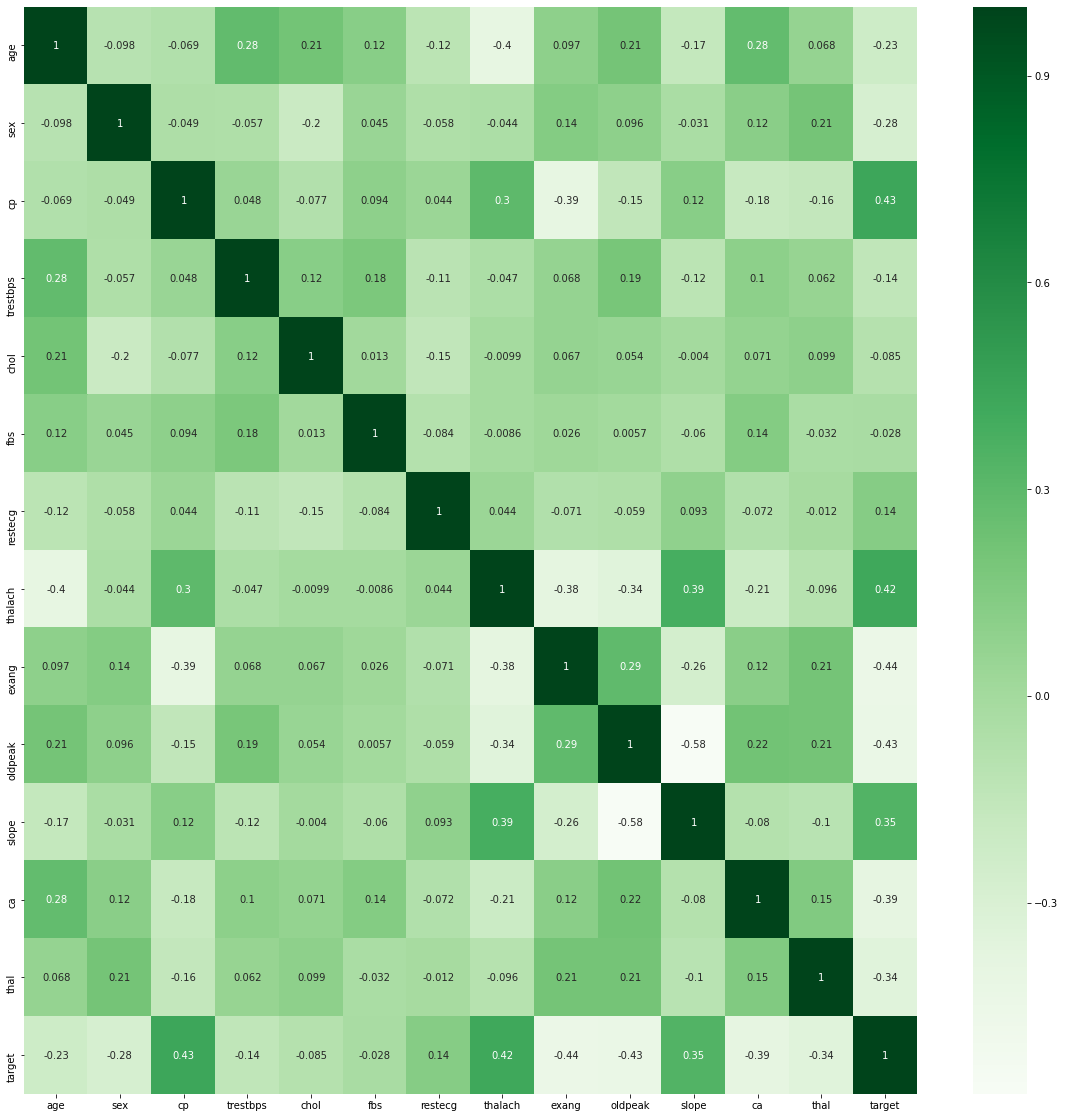

In [5]:
import seaborn as sns 

corr_matrix = data.corr()
top_corr_features = corr_matrix.index
plt.figure(figsize=(20,20))

# plotting heatmap 
heat_map = sns.heatmap(data[top_corr_features].corr(), annot=True, cmap="Greens")

<AxesSubplot:xlabel='target', ylabel='count'>

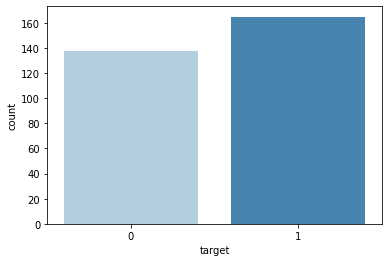

In [6]:
# checking if the dataset is balanced or not 

sns.countplot(x='target', data=data, palette='Blues')  
# countplot : Show the counts of observations in each categorical bin using bars.

In [7]:
# another method to check if the dataset is balanced 

have_heart_disease_count = len(data.loc[data['target'] == 1])
havenot_heart_disease_count = len(data.loc[data['target'] == 0])

(havenot_heart_disease_count,have_heart_disease_count) 

(138, 165)

## Data Preprocessing



In [8]:
dataset = pd.get_dummies(data, columns= ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

In [9]:
from sklearn.preprocessing import StandardScaler 

#StandardScaler removes the mean and scales each feature/variable to unit variance.
standardScaler = StandardScaler()
cols_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']  # these columns' values have large variations , also measured in different units
                                                                   # therefore, standard scaling is required 
                                                                   # i.e. converting them from -3 to +3 , -1 to +1 and so on (based on standard normal distribution)
dataset[cols_to_scale] = standardScaler.fit_transform(dataset[cols_to_scale])

In [10]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,1,0,0,1,...,1,1,0,0,0,0,0,0,1,0
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,0,1,0,1,...,1,1,0,0,0,0,0,0,1,0
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0


#### in the above output, the values of fields 'age', 'trestbps', 'chol', 'thalach', 'oldpeak' are rescaled down 

In [11]:
Y = dataset['target']
X = dataset.drop(['target'], axis=1)

### 1) Using KNN classification 

In [12]:
# Here, we are using cross-validation(where train-test splitting will happen internally for all 10 experiments) instead of train_test_split 
from sklearn.model_selection import cross_val_score 
knn_scores = []
for k in range(1,21): #we consider 20 nearest neighbours 
    knn_classifier = KNeighborsClassifier(n_neighbors = k) # we have to derive K' value
    score = cross_val_score(knn_classifier, X, Y, cv=10)  #cross-validation score = 10 i.e based on 10 experiements, there will be 0 different values of 'score'
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

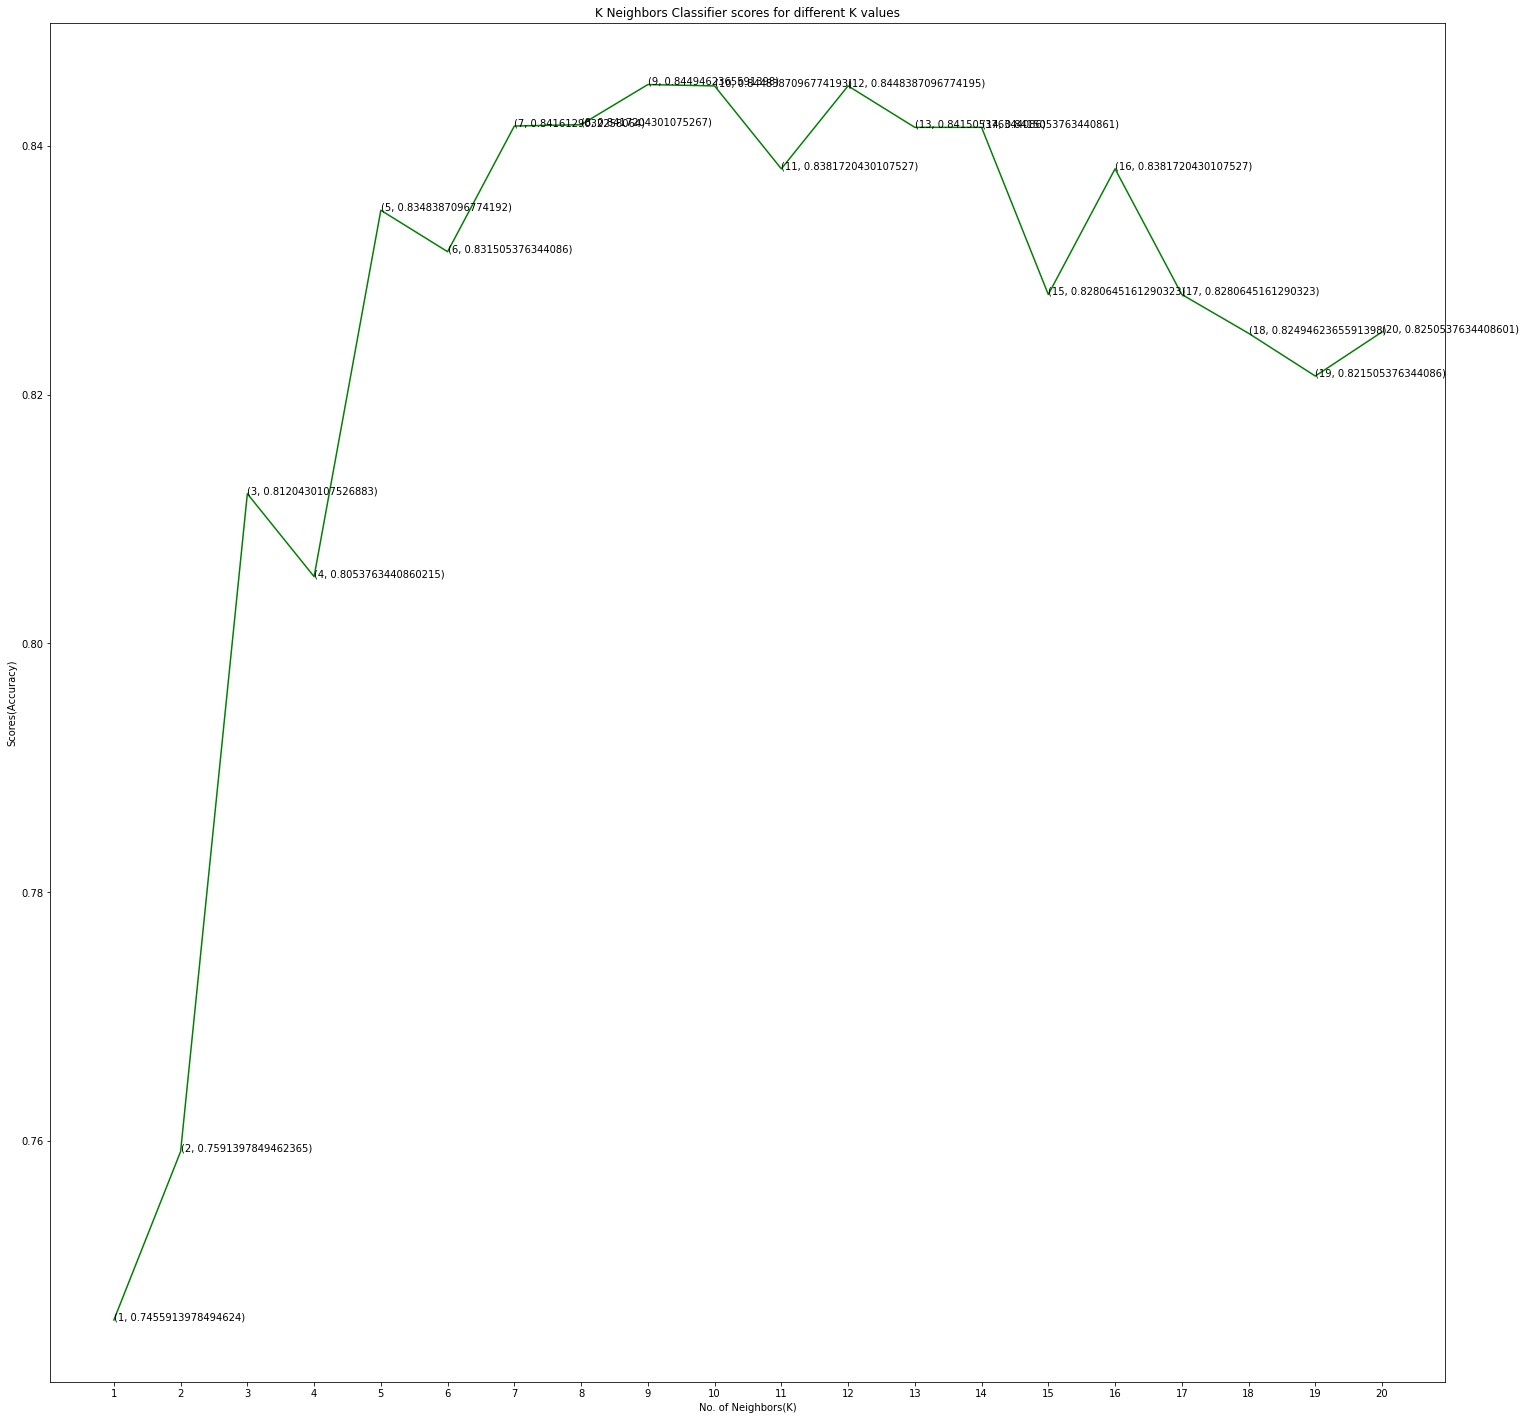

In [13]:
plt.figure(figsize=(25,25))  
plt.plot([k for k in range(1,21)], knn_scores, color='green')

for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1,21)])
plt.xlabel('No. of Neighbors(K)')
plt.ylabel('Scores(Accuracy)')

plt.title('K Neighbors Classifier scores for different K values')

In [14]:
knn_scores # to see the list of all the cv scores(accuracy) for all 20 Nearest Neighbors 

[0.7455913978494624,
 0.7591397849462365,
 0.8120430107526883,
 0.8053763440860215,
 0.8348387096774192,
 0.831505376344086,
 0.8416129032258064,
 0.8417204301075267,
 0.8449462365591398,
 0.8448387096774193,
 0.8381720430107527,
 0.8448387096774195,
 0.841505376344086,
 0.8415053763440861,
 0.8280645161290323,
 0.8381720430107527,
 0.8280645161290323,
 0.8249462365591398,
 0.821505376344086,
 0.8250537634408601]

##### (in the above output) we can see max accuracy for 12 K 

In [26]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score = cross_val_score(knn_classifier, X, Y, cv=10)  
print('KNN Model score : {0:0.2f}%'. format(score.mean()*100.00))

KNN Model score : 84.48%


### 2) Using Random Forest Classifier 

In [22]:
from sklearn.ensemble import RandomForestClassifier 

In [23]:
randomforest_classifier = RandomForestClassifier(n_estimators=10)
score = cross_val_score(randomforest_classifier, X, Y, cv=10)

In [25]:
print('Random Forest Model score : {0:0.2f}%'. format(score.mean()*100.00))

Random Forest Model score : 82.82%
